In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

In [4]:
path = Path('/home/ubuntu/food-101')
path

PosixPath('/home/ubuntu/food-101')

In [5]:
data = ImageDataBunch.from_csv(path, folder='images', csv_labels='train.csv', fn_col=0, label_col=1, 
                               suffix='.jpg', size=299, bs=bs, ds_tfms=get_transforms()).normalize(imagenet_stats)

In [6]:
print(len(data.train_ds))
print(len(data.valid_ds))

60600
15149


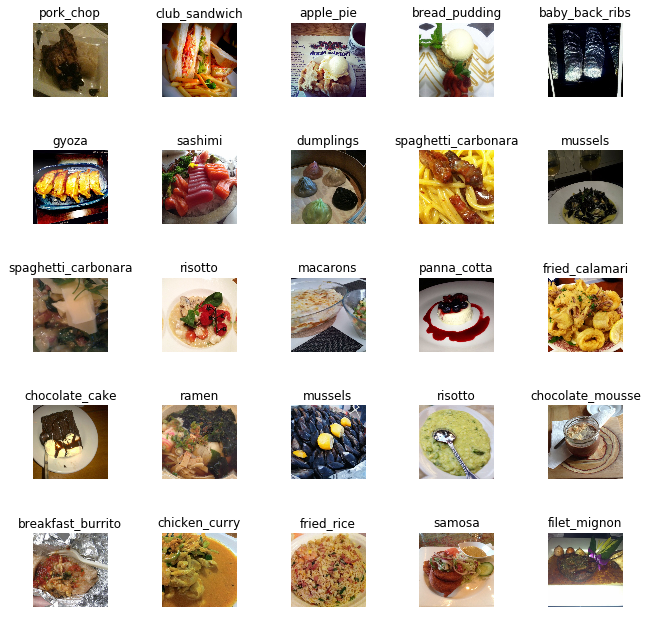

In [7]:
data.show_batch(rows=5, figsize=(9,9))

In [8]:
print(data.classes)
len(data.classes),data.c

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

(101, 101)

In [9]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/ubuntu/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 95319037.97it/s]


In [11]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy
1,1.981458,1.559789,0.607367
2,1.579388,1.275133,0.663608
3,1.403901,1.137803,0.698528
4,1.271165,1.049042,0.720114
5,1.174328,0.977477,0.739389
6,1.046014,0.926116,0.753119
7,0.953016,0.904247,0.759456
8,0.902141,0.902378,0.759258


In [12]:
learn.save('v3_stage1')

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

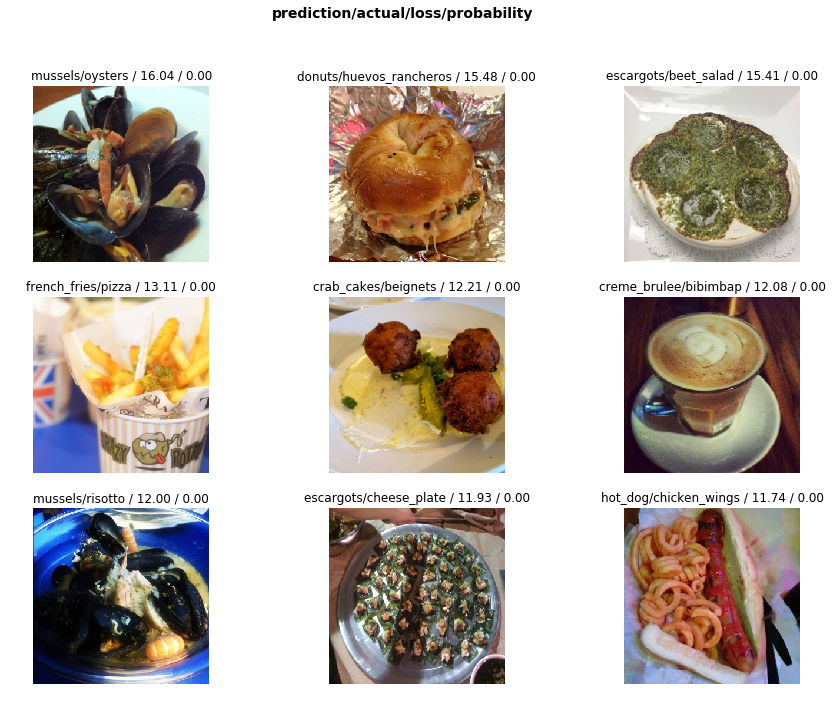

In [14]:
interp.plot_top_losses(9, figsize=(15,11))

In [15]:
interp.most_confused(min_val=10)

[('steak', 'filet_mignon', 29),
 ('filet_mignon', 'steak', 19),
 ('apple_pie', 'bread_pudding', 18),
 ('sushi', 'sashimi', 18),
 ('chocolate_mousse', 'chocolate_cake', 17),
 ('tuna_tartare', 'beef_tartare', 17),
 ('beef_tartare', 'tuna_tartare', 16),
 ('pork_chop', 'steak', 14),
 ('chocolate_cake', 'chocolate_mousse', 13),
 ('dumplings', 'gyoza', 13),
 ('grilled_salmon', 'pork_chop', 13),
 ('lobster_bisque', 'clam_chowder', 12),
 ('prime_rib', 'filet_mignon', 12),
 ('tiramisu', 'chocolate_mousse', 12),
 ('baby_back_ribs', 'steak', 11),
 ('club_sandwich', 'grilled_cheese_sandwich', 11),
 ('ravioli', 'shrimp_and_grits', 11)]

In [16]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


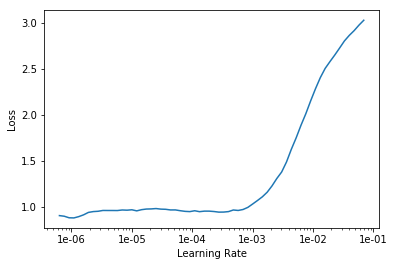

In [17]:
learn.lr_find()
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy
1,0.908789,0.873747,0.765529
2,0.805969,0.835901,0.777213
3,0.782002,0.829501,0.778929


In [19]:
learn.save('v3_stage2')

In [20]:
from fastai.widgets import *

In [21]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [22]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [ ]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)

In [ ]:
ImageCleaner(ds, idxs, path, duplicates=True)